In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import seaborn as sns

In [2]:
uac = pd.read_csv("Unemployment and Crime.csv")

In [3]:
uac1 = uac[['Rape', 'Unemploy_Georgia']]

In [4]:
uac1.head()

,Rape,Unemploy_Georgia
0,139,0.091
1,127,0.086
2,144,0.082
3,160,0.079
4,193,0.082


In [5]:
uac1.dropna(inplace = True)

<ipython-input-5-1494953dd90a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac1.dropna(inplace = True)


In [6]:
uac1.head()

,Rape,Unemploy_Georgia
0,139,0.091
1,127,0.086
2,144,0.082
3,160,0.079
4,193,0.082


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rape', ylabel='Density'>

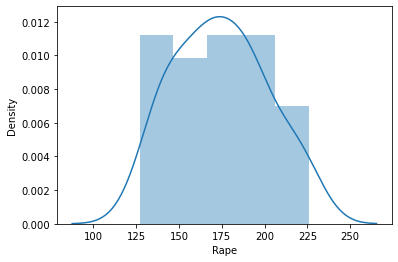

In [7]:
sns.distplot(uac1['Rape'])

In [8]:
uac1['RapeSQRT'] = np.sqrt(uac1['Rape'])

<ipython-input-8-bde40ea7d5a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uac1['RapeSQRT'] = np.sqrt(uac1['Rape'])


In [9]:
uac1.head()

,Rape,Unemploy_Georgia,RapeSQRT
0,139,0.091,11.789826
1,127,0.086,11.269428
2,144,0.082,12.000000
3,160,0.079,12.649111
4,193,0.082,13.892444


/Users/lescrone/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RapeSQRT', ylabel='Density'>

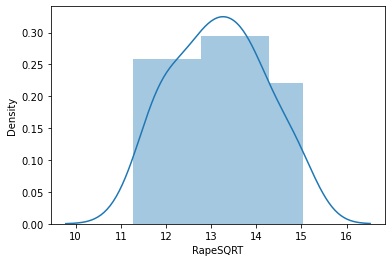

In [10]:
sns.distplot(uac1['RapeSQRT'])

In [11]:
scipy.stats.bartlett(uac1['RapeSQRT'], uac1['Unemploy_Georgia'])

BartlettResult(statistic=267.6872675813268, pvalue=3.6221555432836095e-60)

In [12]:
scipy.stats.fligner(uac1['RapeSQRT'], uac1['Unemploy_Georgia'])

FlignerResult(statistic=38.421951945951406, pvalue=5.69877518133817e-10)

## Sample Size

In [13]:
uac1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rape              36 non-null     int64  
 1   Unemploy_Georgia  36 non-null     float64
 2   RapeSQRT          36 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


## Independence

## Analysis

In [14]:
uac1.Unemploy_Georgia.value_counts()

0.082    3
0.057    3
0.073    3
0.060    2
0.080    2
0.054    2
0.079    2
0.066    2
0.076    2
0.064    2
0.063    2
0.091    1
0.061    1
0.062    1
0.072    1
0.069    1
0.074    1
0.067    1
0.086    1
0.075    1
0.089    1
0.088    1
Name: Unemploy_Georgia, dtype: int64

In [15]:
postHoc = MultiComparison(uac1['RapeSQRT'], uac1['Unemploy_Georgia'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 0.054  0.057   0.8926    0.9  -2.475 4.2602  False
 0.054   0.06   0.8384    0.9 -2.8506 4.5274  False
 0.054  0.061  -1.0922    0.9 -5.6103 3.4258  False
 0.054  0.062   1.1012    0.9 -3.4168 5.6193  False
 0.054  0.063   -1.259    0.9 -4.9479   2.43  False
 0.054  0.064   0.6364    0.9 -3.0526 4.3253  False
 0.054  0.066  -0.0943    0.9 -3.7832 3.5947  False
 0.054  0.067  -0.4494    0.9 -4.9675 4.0686  False
 0.054  0.069    0.237    0.9  -4.281 4.7551  False
 0.054  0.072   0.7118    0.9 -3.8062 5.2299  False
 0.054  0.073  -0.9519    0.9 -4.3194 2.4157  False
 0.054  0.074  -0.4494    0.9 -4.9675 4.0686  False
 0.054  0.075  -1.5976    0.9 -6.1157 2.9204  False
 0.054  0.076   1.0951    0.9 -2.5939 4.7841  False
 0.054  0.079  -0.2966    0.9 -3.9855 3.3924  False
 0.054   0.08   0.6246    0.9 -3.0644 4.3135  False
 0.054  0.08

In [16]:
uac1.groupby('Unemploy_Georgia').mean()

,Rape,RapeSQRT
Unemploy_Georgia,,
0.054,175.000000,13.216580
0.057,199.333333,14.109183
0.060,198.500000,14.054997
0.061,147.000000,12.124356
0.062,205.000000,14.317821
0.063,143.000000,11.957603
0.064,193.000000,13.852956
0.066,172.500000,13.122300
0.067,163.000000,12.767145
